In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 에러문구무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파일 읽어오기
bestseller = pd.read_excel('교보 2021년 상반기 베스트셀러 목록 100위.xlsx')
# 100위까지 자르기
bestseller = bestseller.head(100)
# 컬럼명 알아보기 쉽게 수정
bestseller.columns=['순위','ISBN','도서명','여','남','1위 연령대','2위 연령대','저자','출판사','분야']
# 여,남 컬럼은 책에 대한 성별 비율임
# 여,남 int형으로 형변환하기위해 %잘라내기
bestseller.여 = bestseller.여.str.split('%').str.get(0)
bestseller.남 = bestseller.남.str.split('%').str.get(0)
# NaN값 0으로 바꾸기
bestseller['여'] = bestseller['여'].fillna(0)
bestseller['1위 연령대'] = bestseller['1위 연령대'].fillna(0)
bestseller['남'] = bestseller['남'].fillna(0)
bestseller['2위 연령대'] = bestseller['2위 연령대'].fillna(0)
# 여,남 int로 타입바꾸기
bestseller.여 = bestseller.여.astype('int')
bestseller.남 = bestseller.남.astype('int')

In [3]:
bestseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    int64 
 1   ISBN    100 non-null    int64 
 2   도서명     100 non-null    object
 3   여       100 non-null    int32 
 4   남       100 non-null    int32 
 5   1위 연령대  100 non-null    object
 6   2위 연령대  100 non-null    object
 7   저자      100 non-null    object
 8   출판사     100 non-null    object
 9   분야      100 non-null    object
dtypes: int32(2), int64(2), object(6)
memory usage: 7.2+ KB


In [4]:
bestseller

,순위,ISBN,도서명,여,남,1위 연령대,2위 연령대,저자,출판사,분야
0,1,9791165341909,달러구트 꿈 백화점,78,22,40대,30대,이미예,팩토리나인,소설
1,2,9791160023176,주린이가 가장 알고 싶은 최다질문 TOP 77,59,41,40대,30대,염승환,메이트북스,경제경영
2,3,9788901246086,2030 축의 전환,67,33,40대,50대,마우로 기옌,리더스북,경제경영
3,4,9791164136452,공정하다는 착각,52,48,40대,20대,마이클 샌델,와이즈베리,인문
4,5,9791165210144,주식투자 무작정 따라하기,49,51,30대,40대,윤재수,길벗,경제경영
...,...,...,...,...,...,...,...,...,...,...
95,96,9788965423386,해커스 토익 스타트 리스닝,100,0,20대,0,David Cho,해커스어학연구소,토익토플
96,97,9788901248158,유리멘탈을 위한 심리책,78,22,20대,40대,미즈시마 히로코,갤리온,자기계발
97,98,9791158741051,심리학을 만나 행복해졌다,63,37,50대,30대,장원청,미디어숲,자기계발
98,99,9791197410307,운의 알고리즘,83,17,40대,30대,정회도,소울소사이어티,자기계발


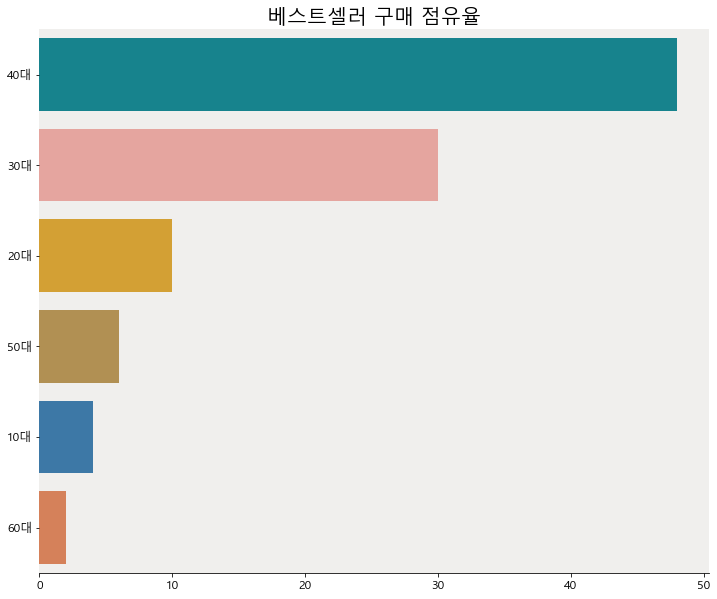

In [91]:
# 베스트셀러 목록에서 연령대별 구매 점유율을 알기위해
# 1위 연령대 컬럼을 카운트 막대그래프로 나타내기

# 그래프 사이즈
plt.figure(figsize=(12,10))
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 세대별 구분위해 컬러
palette = ['#0493a0','#f09b94','#eda91a','#c19443','#2c7ab7','#e97946'] 
plt.title('베스트셀러 구매 점유율',fontsize=20)
ax = sns.countplot(y='1위 연령대',data=bestseller,palette=palette,order = bestseller['1위 연령대'].value_counts().index)
# 범례 폰트사이즈
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 그래프 꾸미기 - 선 없애기
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# 그래프 꾸미기 - 색으로 채우기
plt.gca().set_facecolor('#f0efed')
# 범례 제거
ax.set(xlabel=None)
ax.set(ylabel=None)
# 그래프 png로 저장
plt.savefig('bestsellerage.png')
plt.show()

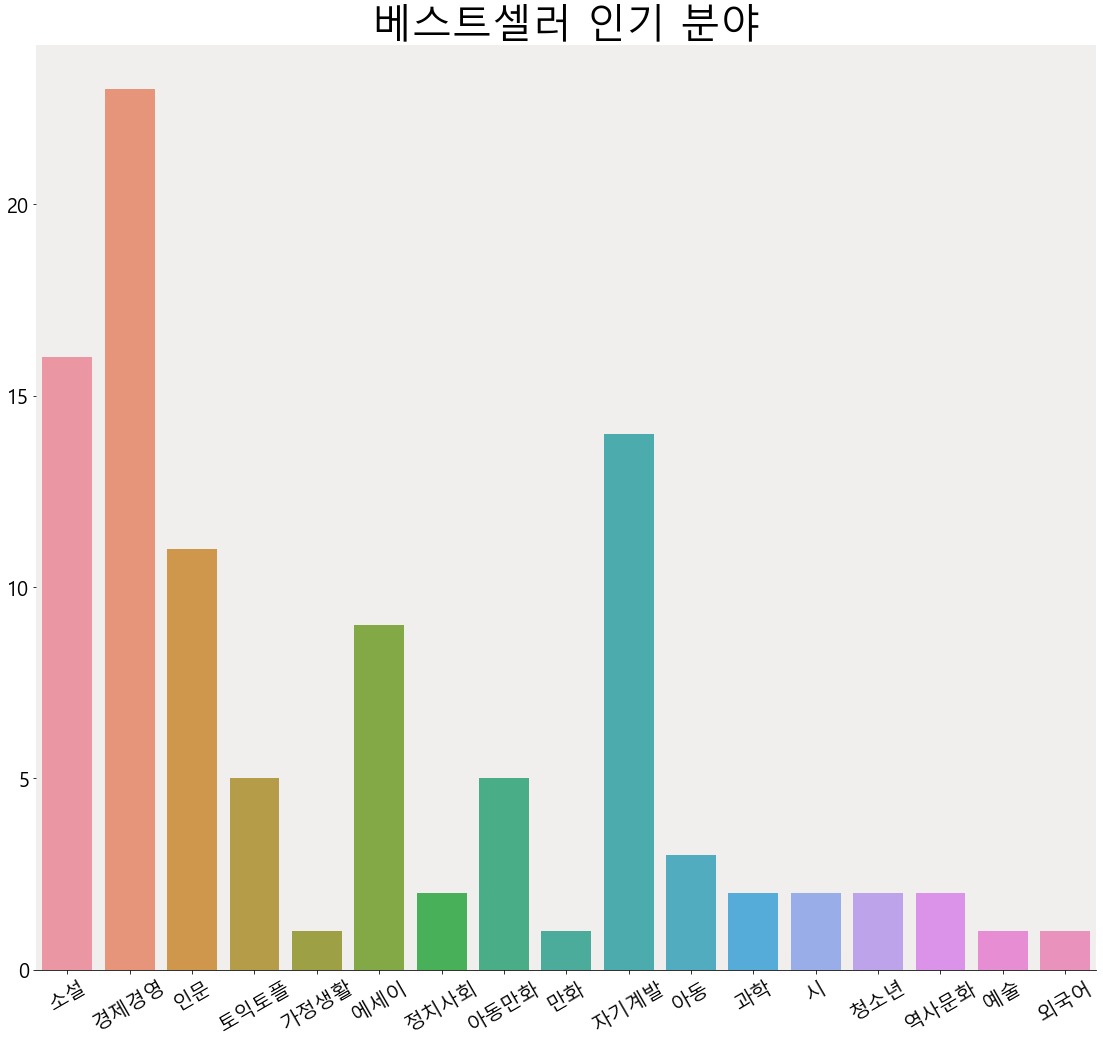

In [104]:
# 베스트셀러 목록에서 분야별 카운트 막대그래프로 나타내기
plt.figure(figsize=(19,17))
plt.title('베스트셀러 인기 분야',fontsize=40)
plt.xticks(fontsize=20,rotation=30)
plt.yticks(fontsize=20)
ax =sns.countplot(x='분야',data=bestseller)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('#f0efed')
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.savefig('bestsellerhot.png')
plt.show()

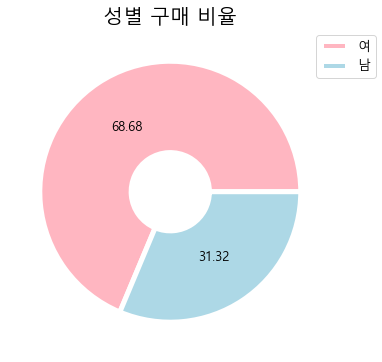

In [134]:
# 베스트셀러에서 성별 구매 비율 파이그래프로 나타내기
# 한 권당 여성 구매 비율 컬럼인 '여'의 평균
plt.figure(figsize=(6,6))
female = bestseller['여'].mean()
# 한 권당 남성 구매 비율 컬럼인 '남'의 평균
male = bestseller['남'].mean()
# female과 male을 label로 파이그래프 작성
labels = [female,male]
timetables = ['여','남']
plt.rcParams['font.size']=13
plt.title('성별 구매 비율', fontsize=20)
# 도넛모양 그래프로 나타내기
wedgeprop={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
# plt.legend()
plt.pie(labels,autopct='%.2f',labels=None,colors=['lightpink','lightblue'], wedgeprops=wedgeprop)
# 범례 표시
plt.legend(timetables,loc='upper right', bbox_to_anchor=(1.15, 1)) 
plt.savefig('bestsellergender.png')
plt.show()